## Coding Exercise #0604a

### Classify the cloth images

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#### 1.1.Import the fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Each image is mapped to one individual label. Because there's no class name to dataset, save data as separate variables for printing images. 

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 1.2. Data exploration

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

#### 1.3. Data preprocessing

In [10]:
# The first image of train set shows that the scope of pixels is in 0~255.  

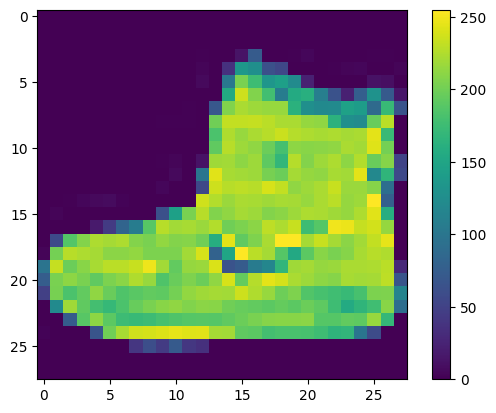

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Before passing into neural network model, set this range to 0~1.

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

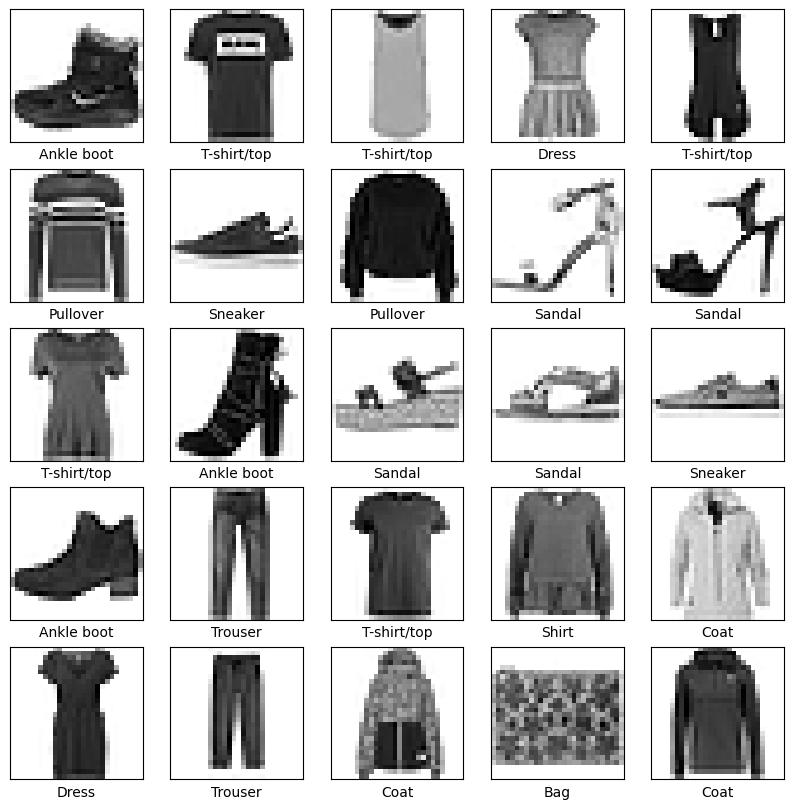

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 1.4. Create the model

In [15]:
# Set the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### 1.5. Compile the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### 1.6. Train the model

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.4985 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 1s 592us/step - loss: 0.3738 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 1s 601us/step - loss: 0.3374 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 1s 592us/step - loss: 0.3114 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.2941 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 1s 604us/step - loss: 0.2809 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 1s 596us/step - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 1s 631us/step - loss: 0.2570 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.2495 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 1s 612u

In [18]:
#### 1.7. Evaluate the accuracy of model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3576 - accuracy: 0.8770 - 156ms/epoch - 499us/step

Test accuracy: 0.8769999742507935


#### 1.8. Prediction

In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 343us/step


array([2.8497213e-08, 2.7361276e-11, 4.5014448e-10, 9.6399859e-12,
       4.7956972e-09, 1.6105674e-03, 2.1266908e-08, 8.7988190e-03,
       3.9740135e-07, 9.8959023e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9